<a href="https://colab.research.google.com/github/sarychief/cv-tasks/blob/main/MNIST_%26_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras
from keras.datasets import mnist        
from keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

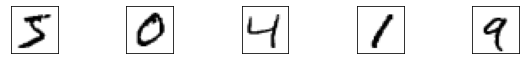

In [8]:
# отображение 10 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

In [10]:
x_train[0].shape

(28, 28)

In [20]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy', # ибо softmax
             metrics=['accuracy'],
              )

In [23]:
history = model.fit(x_train, 
                    y_train_cat, 
                    batch_size=32, 
                    epochs=20, 
                    validation_split=0.2,
                    verbose=True
                    )

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2851 - accuracy: 0.9204 - val_loss: 0.1637 - val_accuracy: 0.9516
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1278 - accuracy: 0.9632 - val_loss: 0.1166 - val_accuracy: 0.9655
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0876 - accuracy: 0.9736 - val_loss: 0.1045 - val_accuracy: 0.9672
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0909 - val_accuracy: 0.9712
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0976 - val_accuracy: 0.9708
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0402 - accuracy: 0.9870 - val_loss: 0.0848 - val_accuracy: 0.9746
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0323 - accuracy: 0.9904 - val_loss: 0.0794 - val_accuracy:

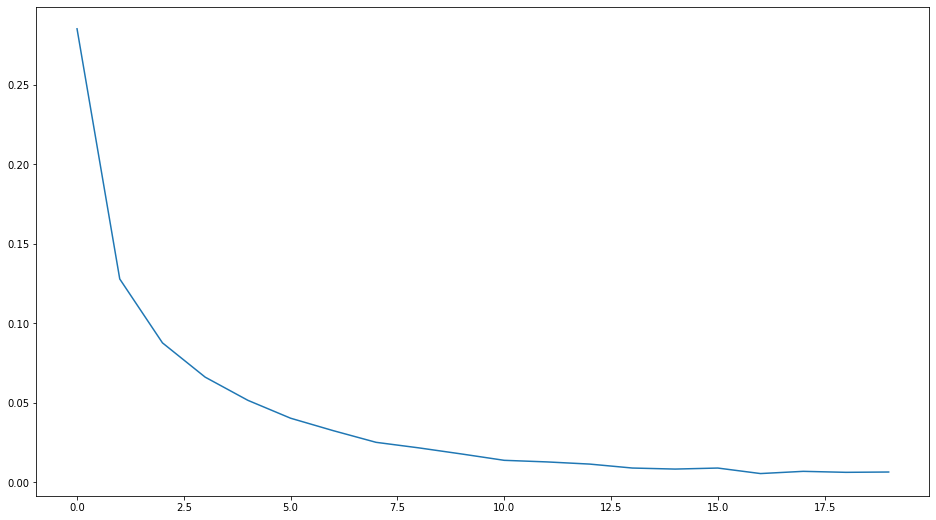

In [24]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])

In [25]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.1069 - accuracy: 0.9778


[0.10692187398672104, 0.9778000116348267]

In [26]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [33]:
mask = pred == y_test


x_false = x_test[~mask]
y_false = x_test[~mask]
p_false = pred[~mask]

Значение предсказания: 5


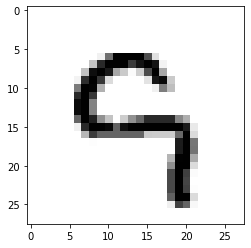

Значение предсказания: 9


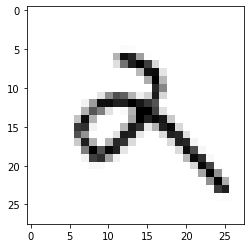

Значение предсказания: 3


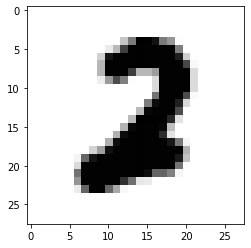

Значение предсказания: 2


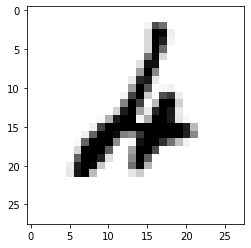

Значение предсказания: 7


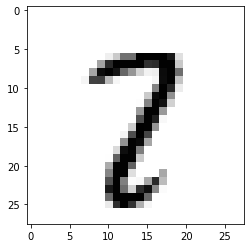

In [38]:
for i in range(5):
    print("Значение предсказания:", str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()